# Will Firmin
# Math 151AH: HW3
# Problem 1)
### Part a)

In [41]:
import numpy as np
def diagonal(A):
    n = len(A)
    D = np.zeros([n,n])
    D[np.diag_indices(n)] = A[np.diag_indices(n)]
    return D

def error(x):
    return ((x - np.array([1,2,3,4]))**2).sum()**0.5

def Jacobi(A, b, N=100):
    n = len(A)
    A2 = diagonal(A)
    A2inv = np.zeros([n,n])
    A2inv[np.diag_indices(n)] = np.reciprocal(A2[np.diag_indices(n)])
    A1 = A - A2
    x = [np.zeros(n)]
    count = 0
    while error(x[-1]) > 10**(-8) and count < N:
        x.append(A2inv.dot(b-A1.dot(x[-1])))
        count += 1
    return x

a = np.array([[2.4117,0.6557,0.6787,0.6555],
              [0.9157,1.8804,0.7577,0.1712],
              [0.7922,0.8491,3.0905,0.7060],
              [0.9595,0.9340,0.3922,2.3175]])
c = np.array([8.3813,7.6345,14.5862,13.2743])

X = Jacobi(a,c, N=125)
eJ = [np.log(error(x)) for x in X]

In [42]:
def SOR(A, b, w, N=100):
    n = len(A)
    x = [np.zeros(n)]
    count = 0
    while error(x[-1]) > 10**(-8) and count < N:
        xk = np.zeros(n)
        xk1 = x[-1]
        for i in range(n):
            s1 = sum([A[i,j]*xk[j] for j in range(i)])
            s2 = sum([A[i,j]*xk1[j] for j in range(i+1,n)])
            xk[i] = w/A[i,i]*(b[i] - s1 - s2) + (1-w)*xk1[i]
        x.append(xk)
        count += 1
    return x

X = SOR(a,c,1.5,N=125)
eS = [np.log(error(x)) for x in X]

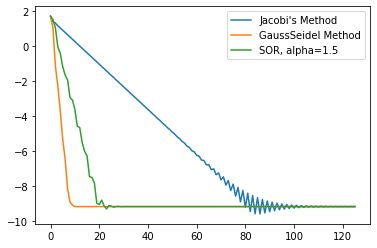

In [43]:
def GaussSeidel(A, b, N=100):
    n = len(A)
    x = [np.zeros(n)]
    count = 0
    while error(x[-1]) > 10**(-8) and count < N:
        xk = np.zeros(n)
        xk1 = x[-1]
        for i in range(n):
            s1 = sum([A[i,j]*xk[j] for j in range(i)])
            s2 = sum([A[i,j]*xk1[j] for j in range(i+1,n)])
            xk[i] = 1/A[i,i]*(b[i] - s1 - s2)
        x.append(xk)
        count += 1
    return x

X = GaussSeidel(a,c,N=125)
eG = [np.log(error(x)) for x in X]

import matplotlib.pyplot as plt
plt.plot(range(len(eJ)), eJ, label="Jacobi's Method")
plt.plot(range(len(eG)), eG, label="GaussSeidel Method")
plt.plot(range(len(eS)), eS, label="SOR, alpha=1.5")
plt.legend()
plt.show()

### Part b)
As seen below, SOR doesn't converge for values of $\omega\not\in(0,2)$

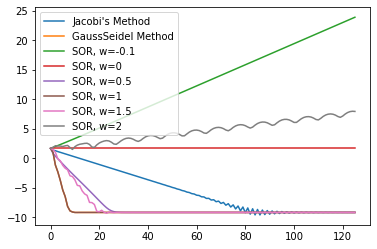

In [38]:
plt.plot(range(len(eJ)), eJ, label="Jacobi's Method")
plt.plot(range(len(eG)), eG, label="GaussSeidel Method")
results = {}
for w in [-0.1,0,0.5,1,1.5,2]:
    res = SOR(a,c,w,N=125)
    res = [np.log(error(x)) for x in res]
    plt.plot(range(len(res)), res, label="SOR, w="+str(w))

plt.legend()
plt.show()

# Problem 2)

$\det D = \prod_i^n \lambda_i\Rightarrow\det D^{-1}=(\prod_i^n \lambda_i)^{-1}$

$\Rightarrow \det(D^{-1}L)=\det(D^{-1})\det(L)=(\prod_i^n \lambda_i)^{-1}(0)=0$

since $L$ is strictly lower triangular.  Therefore $D^{-1}L$ has no nonzero eigenvalues and is also strictly lower triangular (diagonal times strictly lower triangular).  This implies that $I+\omega D^{-1}L$ is lower triangular and thus its diagonal entries (all ones) are its eigenvalues. Then 

$\det(I+\omega D^{-1}L)=\prod_i^n1=1\Rightarrow\det((I+\omega D^{-1}L)^{-1})=1$

By the same logic, we find that 

$\det((1-\omega)I-\omega D^{-1}U)=\prod_i^n(1-\omega)=(1-\omega)^n$

$\Rightarrow |\det\mathcal{D}|=|(1)(1-\omega)^n|=|1-\omega|^n$

Since convergence requires $|\det\mathcal{D}|<1$, this implies that $|1-\omega|<1\Rightarrow\omega\in(0,2)$ is required.

# Problem 3)
Let $S_n=\sum_{k=0}^n M^k$

Then $S_nM=\sum_{k=0}^n M^{k+1}=\sum_{k=1}^{n+1}M^k=S_n-I+M^{n+1}$

$\Rightarrow S_n(I-M)=I-M^{n+1}\Rightarrow S_n=(I-M^{n+1})(I-M)^{-1}$

$\Rightarrow\lim_{n\rightarrow\infty}S_n=(I-M)^{-1}-\lim_{n\rightarrow\infty}M^{n+1}(I-M)^{-1}\\=(I-M)^{-1}-(0)(I-M)^{-1}=(I-M)^{-1}$

# Problem 4)
### Part a)
$x^{(k+1)}=x^{(k)}+\alpha b-\alpha Ax^{(k)}=\alpha b-(\alpha A-I)x^{(k)}$

$\Rightarrow A_2^{-1}=\alpha I\Rightarrow A_2=\alpha^{-1}I$

$\Rightarrow A_1=A-\alpha^{-1}I$

### Part b)
WTS $\frac{\|g(x)-g(y)\|}{\|x-y\|}<1\;\forall x,y\in\mathbb{R}^n$

$$\begin{aligned}
\|g(x)-g(y)\|&=\|x-y-\alpha A(x-y)\|\\
&=\|(I-\alpha A)(x-y)\|\\
&\leq\|I-\alpha A\|\|x-y\|\\
\Rightarrow \frac{\|g(x)-g(y)\|_2}{\|x-y\|_2} &\leq\|I-\alpha A\|_2\\
&=\rho(I-\alpha A)\\
&=\max_\lambda\{|1-\alpha\lambda|\} \;\text{ s.t. }\lambda\;\text{ is an eigenvalue of A}

\end{aligned}$$
Therefore for convergence we need that 
$$\begin{aligned}
\max_\lambda\{|1-\alpha \lambda|\}&<1\\
\Rightarrow |1-\alpha \lambda|&<1\; \forall \lambda\\
\Rightarrow 0 < \alpha \lambda &< 2 \;\forall \lambda\\
\Rightarrow 0 < \alpha &< \frac2\lambda \;\forall \lambda \\
\Rightarrow \alpha &\in (0,\frac2{\lambda_1})
\end{aligned}$$

### Part c)
From part b) we have that $\frac{e^{(k+1)}}{e^{(k)}}\leq\rho(I-\alpha A)\Rightarrow e^{(k+1)}\leq\rho(I-\alpha A)^ke^{(0)}$

To optimize convergence, minimize $\rho(I-\alpha A)=max_{1\leq i\leq n}\{|1-\alpha \lambda_i|\}$

For $\alpha\geq0,\;\;1-\alpha\lambda_1\leq1-\alpha\lambda_2\leq...\leq1-\alpha\lambda_n$

Thus the greatest in absolute value will be either $(1-\alpha\lambda_1)$ or $(1-\alpha\lambda_n)$.  If $\alpha\leq0$, then the ordering will reverse, but the extremes will be the same.  At the optimal $\alpha$, it will hold that $|1-\alpha\lambda_1|=|1-\alpha\lambda_n|$ or else $\alpha$ could be adjusted to lower the greater of the two at the expense of the other.

It cannot be that $1-\alpha\lambda_1=1-\alpha\lambda_n$ since this implies that $\lambda_1=\lambda_n$.

Therefore it must be that $1-\alpha\lambda_1=-1+\alpha\lambda_n\Rightarrow \alpha=\frac2{\lambda_1+\lambda_n}$

### Part d)
Since $A$ is symmetric and positive definite, we have that $\|A^{-1}\|_2=\frac1{\lambda_{min}}$ and $\|A\|_2=\lambda_{max}$.  Therefore $\kappa_2(A)=\frac{\lambda_1}{\lambda_n}$.

$$\begin{aligned}
\rho(M)&=\rho(-A_2^{-1}A_1)\\
&=\rho(-\alpha I(A-\alpha^{-1}I))\\
&=\rho(I-\alpha A)\\
&= |1-\alpha\lambda_1|\\
&=|1-\frac{2\lambda_1}{\lambda_1+\lambda_n}|\\
&=|\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}|\\
&=\frac{\lambda_1-\lambda_n}{\lambda_1+\lambda_n}\\
&=\frac{\frac{\lambda_1}{\lambda_n}-1}{\frac{\lambda_1}{\lambda_n}+1}\\
&=\frac{\kappa_2(A)-1}{\kappa_2(A)+1}

\end{aligned}$$

# Problem 5)
### Part a)

$$
G_\gamma(1,1)=
\left[{\begin{array}{c}
\gamma(1-1)\cos(\frac\pi{10})-\gamma(1-1)\sin(\frac\pi{10})+1  \\
\gamma(1-1)\sin(\frac\pi{10})+\gamma(1-1)\cos(\frac\pi{10})+5(1-1)^3+1  \\
\end{array} }\right]
=
\left[{\begin{array}{c}
1  \\
1  \\
\end{array} }\right]
$$

### Part b)
$$
J_{G|x}=
\left[{\begin{array}{cc}
\gamma\cos(\frac\pi{10}) & -\gamma\sin(\frac\pi{10}) \\
\gamma\sin(\frac\pi{10})+15(x_1-1)^2 & \gamma\cos(\frac\pi{10}) \\
\end{array} }\right]
\\\;\\
J_{G|x^{*}}=
\left[{\begin{array}{cc}
\gamma\cos(\frac\pi{10}) & -\gamma\sin(\frac\pi{10}) \\
\gamma\sin(\frac\pi{10}) & \gamma\cos(\frac\pi{10}) \\
\end{array} }\right]
$$

### Part c)
$$
J_{G|x^{*}}=\gamma U \text{ where } U=
\left[{\begin{array}{cc}
\cos(\frac\pi{10}) & -\sin(\frac\pi{10}) \\
\sin(\frac\pi{10}) & \cos(\frac\pi{10}) \\
\end{array} }\right]
\\\;\\
U^\intercal U=I \Rightarrow U \text{ is orthogonal, so}\\
\|J_{G|x^{*}}\|_2=\|\gamma U\|_2=\gamma\|U\|_2=\gamma
$$

### Part d)
FPI converges when $\|J_{G|x^{*}}\|_2<1$, which in this case is equivalent to $\gamma<1$.

# Problem 6)
### Part a)
$F(\mathbf{0})=(0^2+0^2+5(0),2(0)(0)+3(0)^2+0)^\intercal=\mathbf{0}$

### Part b)
$$
J_{F|x}=
\left[{\begin{array}{cc}
2x_1+5 & 2x_2 \\
2x_2 & 2x_1+6x_2+1 \\
\end{array} }\right]

\\\;\\
J_{F|x^*}=
\left[{\begin{array}{cc}
5 & 0 \\
0 & 1 \\
\end{array} }\right]

\\\;\\
H_{F_1|x^*}=
\left[{\begin{array}{cc}
2 & 0 \\
0 & 2 \\
\end{array} }\right]

\\\;\\
H_{F_2|x^*}=
\left[{\begin{array}{cc}
0 & 2 \\
2 & 6 \\
\end{array} }\right]
$$

### Part c)
$$
J_{F|x^*}=
\left[{\begin{array}{cc}
1-5\alpha & 0 \\
0 & 1-\alpha \\
\end{array} }\right]
\\\;\\
\|J_{G|x^*}\|=\rho(J_{G|x^*})=\max\{|1-5\alpha|,|1-\alpha|\}<1\text{ for }\alpha\in(0,\frac25)
$$

### Part d)
We know that $F\in C^2(\mathbb{R}^2)$ since each component is a polynomial of $x_1$ and $x_2$.  It then immediately follows that $G\in C^2(\mathbb{R}^2)$ since $G$ is a linear combination of two twice continuous functions $x$ and $F$.  It was shown earlier that for $x^*=\mathbf{0}$, $F(x^*)=\mathbf{0}$.  This then implies that $G(x^*)=x^*-\alpha F(x^*)=x^*$.  It was also shown that there exists sufficiently small $\alpha$ such that $\rho(J_{G|x^*})=\|J_{G|x^*}\|<1$.  These results satisfy the conditions of the Local Convergence Theorem of Vector FPI, so we can guarentee that $\{x^{(k)}\}$ converges to $x^*$ for sufficiently close $x^{(0)}$ to $x^*$.

### Part e)

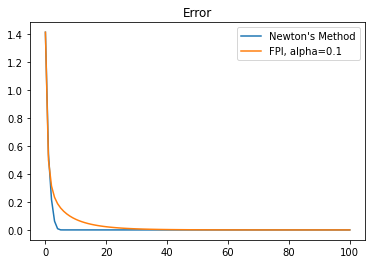

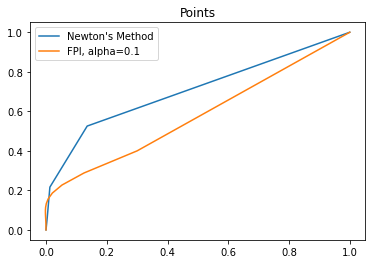

In [64]:
F = lambda x: np.array([x[0]**2 + x[1]**2 + 5*x[0], 2*x[0]*x[1] + 3*x[1]**2 + x[1]])
J = lambda x: np.array([[2*x[0] + 5, 2*x[1]],
                            [2*x[1], 2*x[0] + 6*x[1] + 1]])

def Newton(F, J, n, N=100, x0=None):
    if x0 == None:
        x = [np.zeros(n)]
    else:
        x = [x0]
    count = 0
    while count < N:
        xk1 = x[-1]
        xk = xk1 - np.linalg.solve(J(xk1),F(xk1))
        x.append(xk)
        count += 1
    return x

def FPI(F, n, alpha, N=100, x0=None):
    if x0 == None:
        x = [np.zeros(n)]
    else:
        x = [x0]
    count = 0
    while count < N:
        xk1 = x[-1]
        xk = xk1 - alpha*F(xk1)
        x.append(xk)
        count += 1
    return x

xN = np.array(Newton(F, J, 2, x0=(1,1)))
xF = np.array(FPI(F, 2, 0.1,x0=(1,1)))
def error(x):
    x = x**2
    return (x[:,0]+x[:,1])**0.5

plt.plot(range(len(xN)), error(xN), label="Newton's Method")
plt.plot(range(len(xF)), error(xF), label="FPI, alpha=0.1")
plt.legend()
plt.title("Error")
plt.show()

plt.plot(xN[:,0],xN[:,1], label="Newton's Method")
plt.plot(xF[:,0],xF[:,1], label="FPI, alpha=0.1")
plt.legend()
plt.title("Points")
plt.show()

# Problem 7)
As shown below, 0 iterations of Jacobi's method fails to converge, but 1 iteration successfully converges.

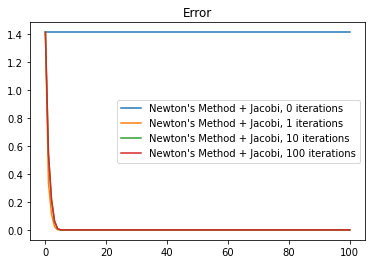

In [84]:
F = lambda x: np.array([x[0]**2 + x[1]**2 + 5*x[0], 2*x[0]*x[1] + 3*x[1]**2 + x[1]])
J = lambda x: np.array([[2*x[0] + 5, 2*x[1]],
                            [2*x[1], 2*x[0] + 6*x[1] + 1]])

def Jacobi(A, b, N=100):
    n = len(A)
    A2 = diagonal(A)
    A2inv = np.zeros([n,n])
    A2inv[np.diag_indices(n)] = np.reciprocal(A2[np.diag_indices(n)])
    A1 = A - A2
    x = [np.zeros(n)]
    count = 0
    while count < N:
        x.append(A2inv.dot(b-A1.dot(x[-1])))
        count += 1
    return x

def Newton(F, J, n, N=100, x0=None, N2=100):
    if x0 == None:
        x = [np.zeros(n)]
    else:
        x = [x0]
    count = 0
    while count < N:
        xk1 = x[-1]
        xk = xk1 - Jacobi(J(xk1),F(xk1),N2)[-1]
        x.append(xk)
        count += 1
    return x



def error(x):
    x = x**2
    return (x[:,0]+x[:,1])**0.5
for i in [0,1,10,100]:
    xN = np.array(Newton(F, J, 2, x0=(1,1), N2=i))
    plt.plot(range(len(xN)), error(xN), label="Newton's Method + Jacobi, "+str(i)+" iterations")
plt.legend()
plt.title("Error")
plt.show()
